In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import json

In [1]:
!pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)


In [2]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)


In [3]:
!pip install geopandas

  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached Shapely-1.7.1-cp38-cp38-manylinux1_x86_64.whl (1.0 MB)
  Using cached Fiona-1.8.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (15.4 MB)
  Using cached pyproj-3.1.0-cp38-cp38-manylinux2010_x86_64.whl (6.6 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [6]:
df = pd.read_csv("Uninsured.csv")
df

,Location,Age Group,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,Adults 19 Years and Older,2008,Number,3499.71090,101
1,Greenwich Village,Adults 19 Years and Older,2008,Number,5166.28910,102
2,Lower East Side,Adults 19 Years and Older,2008,Number,18710.00000,103
3,Chelsea/Clinton,Adults 19 Years and Older,2008,Number,11661.53068,104
4,Midtown Business District,Adults 19 Years and Older,2008,Number,5836.46932,105
...,...,...,...,...,...,...
2479,Queens Village,Children Under 19 Years,2014,Percent,0.03624,413
2480,The Rockaways,Children Under 19 Years,2014,Percent,0.03055,414
2481,St. George,Children Under 19 Years,2014,Percent,0.03191,501
2482,South Beach,Children Under 19 Years,2014,Percent,0.03925,502


In [7]:
df = df.loc[df['Age Group'] == 'All Ages']
df

,Location,Age Group,TimeFrame,DataFormat,Data,Fips
59,Battery Park/Tribeca,All Ages,2008,Number,3791.69001,101
60,Greenwich Village,All Ages,2008,Number,5597.30999,102
61,Lower East Side,All Ages,2008,Number,19306.00000,103
62,Chelsea/Clinton,All Ages,2008,Number,11825.47722,104
63,Midtown Business District,All Ages,2008,Number,5918.52278,105
...,...,...,...,...,...,...
2420,Queens Village,All Ages,2014,Percent,0.07398,413
2421,The Rockaways,All Ages,2014,Percent,0.06826,414
2422,St. George,All Ages,2014,Percent,0.08055,501
2423,South Beach,All Ages,2014,Percent,0.07504,502


In [8]:
df = df.loc[df['DataFormat'] == 'Number']
df

,Location,Age Group,TimeFrame,DataFormat,Data,Fips
59,Battery Park/Tribeca,All Ages,2008,Number,3791.69001,101
60,Greenwich Village,All Ages,2008,Number,5597.30999,102
61,Lower East Side,All Ages,2008,Number,19306.00000,103
62,Chelsea/Clinton,All Ages,2008,Number,11825.47722,104
63,Midtown Business District,All Ages,2008,Number,5918.52278,105
...,...,...,...,...,...,...
2243,Queens Village,All Ages,2014,Number,14155.00000,413
2244,The Rockaways,All Ages,2014,Number,7108.00000,414
2245,St. George,All Ages,2014,Number,14074.00000,501
2246,South Beach,All Ages,2014,Number,9295.00000,502


In [9]:
df_sum = df.groupby(['Location','TimeFrame'])['Data'].sum()
df_sum = df_sum.to_frame()
df_sum = df_sum.reset_index()
df_sum

,Location,TimeFrame,Data
0,Astoria,2008,32399.0
1,Astoria,2009,29500.0
2,Astoria,2010,36183.0
3,Astoria,2011,34960.0
4,Astoria,2012,28948.0
...,...,...,...
408,Woodhaven,2010,22538.0
409,Woodhaven,2011,24964.0
410,Woodhaven,2012,25276.0
411,Woodhaven,2013,23777.0


In [10]:
gen_unisured_stats = df_sum.groupby('Location')['Data'].mean()
gen_unisured_stats = gen_unisured_stats.sort_values(ascending = False)
gen_unisured_stats = gen_unisured_stats.head(10)

Text(0.5, 1.0, 'Number of People in Households with No Health Insurance - Top 10')

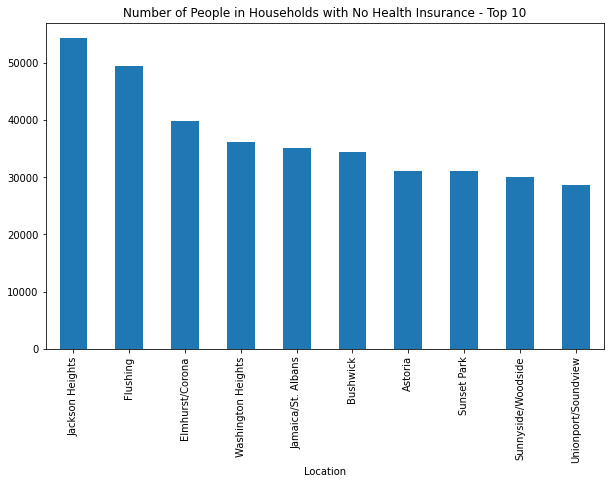

In [11]:
gen_unisured_graph = gen_unisured_stats.plot.bar(figsize=(10,6))
gen_unisured_graph.set_title('Number of People in Households with No Health Insurance - Top 10')

In [12]:
cd = [110,111,201,202,203,204,205,206]
top_asthma_df = df.loc[df['Fips'].isin(cd)]
top_asthma_df

,Location,Age Group,TimeFrame,DataFormat,Data,Fips
68,Central Harlem,All Ages,2008,Number,14885.00000,110
69,East Harlem,All Ages,2008,Number,24892.00000,111
71,Mott Haven,All Ages,2008,Number,17701.31466,201
72,Hunts Point,All Ages,2008,Number,10107.68534,202
73,Morrisania,All Ages,2008,Number,11439.58219,203
74,Concourse/Highbridge,All Ages,2008,Number,27489.00000,204
75,University Heights,All Ages,2008,Number,26730.00000,205
76,East Tremont,All Ages,2008,Number,11942.41781,206
422,Central Harlem,All Ages,2009,Number,19107.00000,110
423,East Harlem,All Ages,2009,Number,19825.00000,111


In [13]:
top_asthma_df_sum = top_asthma_df.groupby(['Location','TimeFrame'])['Data'].sum()
top_asthma_df_sum

Location              TimeFrame
Central Harlem        2008         14885.00000
                      2009         19107.00000
                      2010         18003.00000
                      2011         19269.00000
                      2012         17858.00000
                      2013         18655.00000
                      2014         14121.00000
Concourse/Highbridge  2008         27489.00000
                      2009         27124.00000
                      2010         23673.00000
                      2011         22581.00000
                      2012         19104.00000
                      2013         22728.00000
                      2014         22920.00000
East Harlem           2008         24892.00000
                      2009         19825.00000
                      2010         17416.00000
                      2011         23482.00000
                      2012         18235.00000
                      2013         18408.00000
                      2014  

In [14]:
top_asthma_df_sum = top_asthma_df_sum.reset_index()
top_asthma_df_sum.head()

,Location,TimeFrame,Data
0,Central Harlem,2008,14885.0
1,Central Harlem,2009,19107.0
2,Central Harlem,2010,18003.0
3,Central Harlem,2011,19269.0
4,Central Harlem,2012,17858.0


In [15]:
top_asthma_df_sum_mean = top_asthma_df_sum.groupby('Location')['Data'].mean()
top_asthma_df_sum_mean = top_asthma_df_sum_mean.sort_values(ascending = True)
top_asthma_df_sum_mean

Location
Hunts Point              9320.205669
Morrisania              11955.388710
East Tremont            12480.897004
Mott Haven              16322.222904
Central Harlem          17414.000000
East Harlem             19524.571429
Concourse/Highbridge    23659.857143
University Heights      25617.000000
Name: Data, dtype: float64

Text(0.5, 1.0, 'People with No Health Insurance in High Asthma Regions')

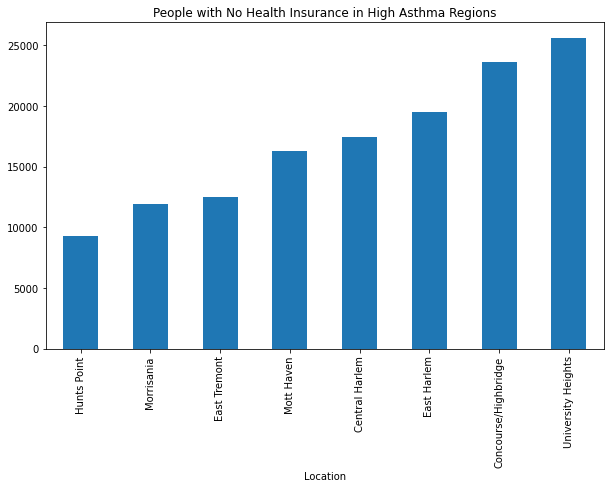

In [16]:
top_asthma_graph = top_asthma_df_sum_mean.plot.bar(figsize=(10,6))
top_asthma_graph.set_title('People with No Health Insurance in High Asthma Regions')

**These locations correspond to our Fips codes for high asthma regions** 